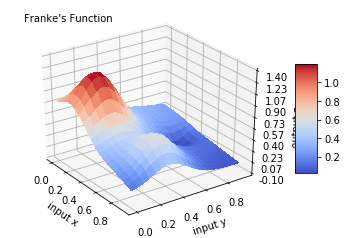

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np 
from random import random, seed
#%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
a = np.arange(0, 1, 0.05)
b = np.arange(0, 1, 0.05) 
a, b = np.meshgrid(a,b)
def FrankeFunction(a,b):
    term1 = 0.75*np.exp(-(0.25*(9*a-2)**2) - 0.25*((9*b-2)**2))
    term2 = 0.75*np.exp(-((9*a+1)**2)/49.0 - 0.1*(9*b+1))
    term3 = 0.5*np.exp(-(9*a-7)**2/4.0 - 0.25*((9*b-3)**2))
    term4 = -0.2*np.exp(-(9*a-4)**2 - (9*b-7)**2) 
    return term1 + term2 + term3 + term4
c = FrankeFunction(a, b)

# Plot the surface.
surf = ax.plot_surface(a, b, c, cmap=cm.coolwarm, linewidth=0, antialiased=False)

 
# Set rotation angle to -35 degrees
ax.view_init(azim=-35)


# Customize the axis.
ax.text2D(0.05, 0.95, "Franke's Function", transform=ax.transAxes)
plt.xlabel('input x')
plt.ylabel('input y')
ax.set_zlabel('output z')
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [3]:
#import various packages
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression


 

In [4]:
import numpy as np

# use seed=0 to reproduce results
np.random.seed(0)

# creating the data
x = np.random.uniform(0,1,1000) 
y = np.random.uniform(0,1,1000)
noise=0.01*np.random.randn(1000)
z = FrankeFunction(x, y) + noise


    

Creating functions for the task:

In [5]:
# function calculating the mean value of a given dataset (equivalent to the integrated mean function)

def samplemean(z):
    #input  : given outcome of experiment
    #output : mean value  
    length = len(z)
    samplemeann = 0
    for k in range(0,length):
        samplemeann = samplemeann+z[k]
        
    samplemeann = (1.0/len(z))*samplemeann
    return samplemeann

In [6]:
# function that creates the designmatrix for two given input features

def designmatrix(x,y,degree):            
    #input1 : x-vector
    #input2 : y-vector
    #input3 : degree of polynomial for fit
    #output : Matrix X as defined in the lecture (in this particular case: up to degree 5 and mixed terms)
    
    lengthx = len(x)
    
    if degree == 5:
        X = np.c_[np.ones((lengthx,1)),x,y,x**2,x*y,y**2, \
                  x**3, x**2*y, x*y**2, y**3, \
                  x**4, x**3*y, x**2*y**2, x*y**3,y**4, \
                  x**5, x**4*y, x**3*y**2, x**2*y**3,x*y**4, y**5]
            
    
    if degree == 4:
        X = np.c_[np.ones((lengthx,1)),x,y,x**2,x*y,y**2, \
                  x**3, x**2*y, x*y**2, y**3, \
                  x**4, x**3*y, x**2*y**2, x*y**3,y**4]
           
            
    if degree == 3:
         X = np.c_[np.ones((lengthx,1)),x,y,x**2,x*y,y**2, \
                  x**3, x**2*y, x*y**2, y**3]
                
            
    if degree == 2:
        X = np.c_[np.ones((lengthx,1)),x,y,x**2,x*y,y**2]
            
           
    return X

In [7]:
# function that finds the coefficients of the regression with matrix inversion

def betareg(x,y,z,degree):             
    #input1 : x-vector
    #input2 : y-vector
    #input3 : given observed data z
    #input4 : degree of polynomial for fit
    #output : coefficients for polynomial fit
   
    X = designmatrix(x,y,degree)
    
    # Calculation of beta
    XtX = np.transpose(X).dot(X)
    XtXinvers = np.linalg.inv(XtX)
    betareg = (XtXinvers.dot(np.transpose(X))).dot(z)   #our coefficients for the Regression

    return betareg 

In [8]:
# function that predicts target values based on a model fitted to inputs x&y and true values z

def zpredict_f(x,y,z,degree):          
    #input1 : x-vector
    #input2 : y-vector
    #input3 : given observed data z
    #input4 : degree of polynomial for fit
    #output : predicted values with linear regression coefficients calculated with x,y
    
    X = designmatrix(x,y,degree)
    beta=betareg(x,y,z,degree)
    
    zpredict = X.dot(beta)

    
    return zpredict


In [9]:
# function calculating the mean squared error 

def MSE(z,zpredict):
    #input1 : given outcome
    #input2 : predicted outcome
    #output : Mean Squared Error
    length = len(z)
    MSE = 0
    for j in range(0,length) :
        term = (z[j]-zpredict[j])**2
        MSE = MSE + term
    MSE = (1.0/length*MSE)
    return MSE


# function that calculates an unbiased estimate of the variance according to Hastie et al. formula (3.8) p.47

def estvar(x,y,z,degree):                          
    #input1 : x-vector
    #input2 : y-vector
    #input3 : given outcome of experiment
    #input4 : degree of polynomial for fit
    #output : estimated variance
    p = np.array([6,10,15,21])
    p = p[degree-2]
    length = len(z)
    zpredictdeg = zpredict_f(x,y,z,degree)
    estvar = 0
    for k in range(0,length):
        estvar = estvar + (z[k]-zpredictdeg[k])**2
    estvar=(1.0/(length-p-1))*estvar
    return estvar

# function calculating the R^2 score

def R2score(z,zpredict):     
    #input1: given outcome of experiment
    #input2: predicted outcome of experiment
    #output: R2 score
    
    lengthz = len(z)
    sum1=0
    for k in range(0,lengthz):
        sum1=sum1+(z[k]-samplemean(z))**2
    
    R2score = 1 - ((MSE(z,zpredict)*lengthz)/(sum1))
    return R2score

# function calculating the variance of the parameters beta

def betavariance(x,y,z,degree):
    #input1 : x-vector
    #input2 : y-vector
    #input3 : given observed data z
    #input4 : degree of polynomial for fit
    #output : vector of variances for beta
    
    X = designmatrix(x,y,degree)
    XtX = np.transpose(X).dot(X)
    XtXinvers = np.linalg.inv(XtX)
    var = estvar(x,y,z,degree)
    betavariance=betareg(x,y,z,degree)
    lengthb=len(betavariance)
    XTXinversvar=var*XtXinvers
    for k in range(0,lengthb):
        betavariance[k]=XTXinversvar[k][k]
    
    return betavariance

In [10]:
# function calculating the confidence intervals around reg. coefficients with lower bound, coefficients and upper bound

def confidence_int(beta,betavar,zalpha):
    #input1 : regression coefficients beta
    #input2 : variance of beta as in function betavariance
    #input3 : z-score and alpha for 1-2alpha confidence interval of the form z^(1-alpha)
    #output : matrix with confidence intervals 
    lengthb=len(beta)
    conf_int=np.zeros([3,lengthb])
    conf_int[1,:]=beta
    conf_int[0,:]=beta-zalpha*np.sqrt(betavar)
    conf_int[2,:]=beta+zalpha*np.sqrt(betavar)
    
    return conf_int
    
    
    
    
    

-----------------------------------------------------------------------------------
OLS - Overview

degree2 
   MSE   :  0.016150699590665965
   R2    :  0.8077946685410116
degree3 
   MSE   :  0.00734178448274909
   R2    :  0.912627306818165
degree4 
   MSE   :  0.003895000348401961
   R2    :  0.9536466003348772
degree5 
   MSE   :  0.0019093538709964873
   R2    :  0.9772772695332976

Variance and confidence intervals of the parameters beta with deg = 5

  coef.number  variance    lower       beta      upper

[[  1.         0.00076    0.18294    0.236985   0.29103 ]
 [  2.         0.088022   8.70296    9.284464   9.865968]
 [  3.         0.078723   4.229886   4.779816   5.329745]
 [  4.         1.857498 -42.230391 -39.559106 -36.887821]
 [  5.         1.218169 -22.146884 -19.983618 -17.820353]
 [  6.         1.65111  -13.488421 -10.969909  -8.451396]
 [  7.         8.823969  51.994813  57.817026  63.639238]
 [  8.         5.32782   48.589553  53.113639  57.637724]
 [  9.         4.

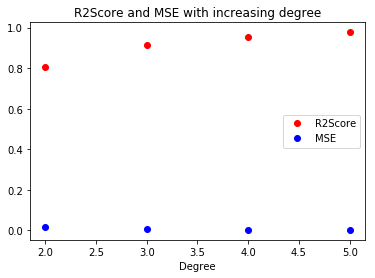

In [11]:
# Overview of MSE and R2-score for 2nd to 5th order polynomial fits
# Including confidence intervals for parameter beta

zalpha=1.96

zpredict5 = zpredict_f(x,y,z,5)
MSE5 = MSE(z,zpredict5)
R2score5 = R2score(z,zpredict5)
conf_int_beta = confidence_int(betareg(x,y,z,5),betavariance(x,y,z,5),zalpha)

zpredict4 = zpredict_f(x,y,z,4)
MSE4 = MSE(z,zpredict4)
R2score4 = R2score(z,zpredict4)

zpredict3 = zpredict_f(x,y,z,3)
MSE3 = MSE(z,zpredict3)
R2score3 = R2score(z,zpredict3)

zpredict2 = zpredict_f(x,y,z,2)
MSE2 = MSE(z,zpredict2)
R2score2 = R2score(z,zpredict2)



print('-----------------------------------------------------------------------------------')
print('OLS - Overview')
print('')
print('degree2 ')
print('   MSE   : ',MSE2)
print('   R2    : ' ,R2score2)
print('degree3 ')
print('   MSE   : ',MSE3)
print('   R2    : ' ,R2score3)
print('degree4 ')
print('   MSE   : ',MSE4)
print('   R2    : ' ,R2score4)
print('degree5 ')
print('   MSE   : ',MSE5)
print('   R2    : ' ,R2score5)
print('')
print('Variance and confidence intervals of the parameters beta with deg = 5')
np.set_printoptions(precision=6)
np.set_printoptions(suppress=True)
print('')
print('  coef.number  variance    lower       beta      upper')
print('')
print(np.c_[np.array(range(1,22)),betavariance(x,y,z,5)[:,np.newaxis],np.transpose(conf_int_beta)])
print('------------------------------------------------------------------------------------')

plotx = [2,3,4,5]
ploty = [R2score2,R2score3,R2score4,R2score5]
plotyy = [MSE2,MSE3,MSE4,MSE5]
plt.plot(plotx,ploty,'ro',label = 'R2Score',ms=6)
plt.plot(plotx,plotyy,'bo',label = 'MSE',ms=6)
plt.title('R2Score and MSE with increasing degree')
plt.xlabel('Degree')
plt.legend()

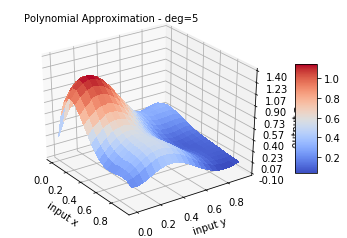

In [12]:
#testplot of the polynomial fit (degree 5)
xplot = np.arange(0, 1, 0.05)
yplot = np.arange(0, 1, 0.05) 
fig = plt.figure()
ax = fig.gca(projection='3d')
lengthxplot=len(xplot)


beta=betareg(x,y,z,5)


zplot=np.zeros((lengthxplot,lengthxplot))

for k in range(0,lengthxplot):
    xk=xplot[k]
    for j in range(0,lengthxplot):
        yj=yplot[j]
        
        designmatrixrow = np.array([1,xk,yj,xk**2, xk*yj, yj**2, \
                                   xk**3, xk**2*yj, xk*yj**2, yj**3, \
                                   xk**4, xk**3*yj, xk**2*yj**2, xk*yj**3,yj**4, \
                                   xk**5, xk**4*yj, xk**3*yj**2, xk**2*yj**3,xk*yj**4,yj**5 \
                                   ])
        zplot[j,k]=designmatrixrow.dot(beta)
                                   
xplot, yplot = np.meshgrid(xplot,yplot)

# Plot the surface.
surf = ax.plot_surface(xplot, yplot, zplot, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Set rotation angle to -35 degrees
ax.view_init(azim=-35)

# Customize the axis
ax.text2D(0.05, 0.95, "Polynomial Approximation - deg=5", transform=ax.transAxes)
plt.xlabel('input x')
plt.ylabel('input y')
ax.set_zlabel('output z')
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [13]:
randomnumber = int(np.random.uniform(0,900,1))
print(randomnumber)

428


In [14]:
x_fixed_test=x[randomnumber:randomnumber+100]
y_fixed_test=y[randomnumber:randomnumber+100]
z_fixed_test=z[randomnumber:randomnumber+100]


In [15]:
# function predicting the test target values by applying the coefficients gained through the training data

def zpredict_cv(x,y,degree,beta):          
    #input1 : x-vector test
    #input2 : y-vector test
    #input3 : degree of polynomial for fit
    #input4 : beta from training
    #output : predicted values with linear regression coefficients calculated with xtrain,ytrain
    
    Xtrain = designmatrix(x,y,degree)
    zpredict = Xtrain.dot(beta)

    
    return zpredict


In [20]:

import random
#generating random partitions of our data 


# k-crossvalidation, we choose k =10, that means we get 10 partitions
k=10

#generating random order of data points
for j in range(0,len(z)):
    switchindex = random.choice(range(0,len(z)))
    switchvalueX = x[j]
    switchvalueY = y[j]
    switchvalueZ = z[j]
    x[j]=x[switchindex]
    y[j]=y[switchindex]
    z[j]=z[switchindex]
    x[switchindex]=switchvalueX
    y[switchindex]=switchvalueY
    z[switchindex]=switchvalueZ
    

partitionsize = int(len(z)/k)
index = 0
bias_var_matrix = np.zeros(partitionsize)

mean_MSE_R2 = np.c_[(np.array(range(2,6))),np.zeros(4),np.zeros(4)]     #Matrix containing average MSE & R2 per degree
#making sure there are zeros in the matrix
for j in range(0,4):
    mean_MSE_R2[j][1]=0
    mean_MSE_R2[j][2]=0


partitionnumber = 1
for k in range(1,k+1):
    print('Partition ',partitionnumber)
    print()
    testx = x[index:index+partitionsize]                                #testdata
    testy = y[index:index+partitionsize]
    testz = z[index:index+partitionsize]
    trainingx =  np.concatenate((x[:index],x[index+partitionsize:]))    #trainingdata
    trainingy =  np.concatenate((y[:index],y[index+partitionsize:]))
    trainingz =  np.concatenate((z[:index],z[index+partitionsize:]))
    
    

    for d in range(2,6):
        degree = d
        betatrain = betareg(trainingx,trainingy,trainingz,degree)               #regression coefficients
        if d == 5:
            zfixedtestpred = zpredict_cv(x_fixed_test,y_fixed_test,5,betatrain)
            bias_var_matrix=np.c_[bias_var_matrix,zfixedtestpred]
        ztestpredict = zpredict_cv(testx,testy,degree,betatrain)                #predicting values for the testset
        
        MSEtest = MSE(testz,ztestpredict)                                       #comparing predicted and real value
        R2scotest = R2score(testz,ztestpredict)
        
        #MSEfix  = MSE(z_fixed_test,zfixedtestpred)
        #Varfix  = np.var(zfixedtestpred)
        #biasfix = np.mean((z_fixed_test-np.mean(zfixedtestpred))**2)
        
        
        
        print(' degree ',degree)
        print('   MSE   : ',MSEtest)
        print('   R2    : ',R2scotest)
        print(' ')
        #print('   MSEfix   : ',MSEfix)
        #print('   var fix    : ',Varfix)
        #print('   bias fix    : ',biasfix)
        
        mean_MSE_R2[degree-2][1] = mean_MSE_R2[degree-2][1]+MSEtest
        mean_MSE_R2[degree-2][2] = mean_MSE_R2[degree-2][2]+R2scotest
        
    print()
    index = index+partitionsize
    partitionnumber += 1
bias_var_matrix=np.delete(bias_var_matrix, 0, 1)    
print('----------------------------------------------------------------')
print()

Partition  1

 degree  2
   MSE   :  0.011954183832861722
   R2    :  0.8262159574290993
 
 degree  3
   MSE   :  0.005656710693621388
   R2    :  0.9177655232899128
 
 degree  4
   MSE   :  0.0037460472594453387
   R2    :  0.9455418081643964
 
 degree  5
   MSE   :  0.0018160930235674633
   R2    :  0.973598533222087
 

Partition  2

 degree  2
   MSE   :  0.01784146095404922
   R2    :  0.7950014476577291
 
 degree  3
   MSE   :  0.0070104811514645985
   R2    :  0.91944950635072
 
 degree  4
   MSE   :  0.003682381855501738
   R2    :  0.9576893982228526
 
 degree  5
   MSE   :  0.0019056724671248223
   R2    :  0.9781038056241437
 

Partition  3

 degree  2
   MSE   :  0.021007836487607554
   R2    :  0.7937098014816704
 
 degree  3
   MSE   :  0.010132677492335153
   R2    :  0.9005003655350672
 
 degree  4
   MSE   :  0.005040945576710511
   R2    :  0.9504995355255579
 
 degree  5
   MSE   :  0.00234606813895728
   R2    :  0.9769623653340734
 

Partition  4

 degree  2
   MSE 

In [21]:

for d in range(2,6):
    mean_MSE_R2[d-2][1] = (mean_MSE_R2[d-2][1])/k
    mean_MSE_R2[d-2][2] = (mean_MSE_R2[d-2][2])/k
print('   MSE & R2 average : ')
print('  degree     MSE      R2')
print(mean_MSE_R2)

   MSE & R2 average : 
  degree     MSE      R2
[[2.       0.016407 0.804338]
 [3.       0.007556 0.909849]
 [4.       0.004108 0.950373]
 [5.       0.001998 0.975934]]


In [22]:
from numpy import var
z_fixed_matrix=np.c_[z_fixed_test,z_fixed_test,z_fixed_test,z_fixed_test,z_fixed_test,z_fixed_test,z_fixed_test,z_fixed_test,z_fixed_test,z_fixed_test]
error = np.mean( np.mean((z_fixed_matrix - bias_var_matrix)**2, axis=1, keepdims=True) )
mod_variance = np.mean(np.var(bias_var_matrix,axis=1,keepdims=True))
Z=np.c_[np.mean(bias_var_matrix, axis=1, keepdims=True), z_fixed_test]
ZZ=np.zeros(100)
for j in range(0,100):
    ZZ[j]=(Z[j][0]-Z[j][1])**2
mod_bias=np.mean(ZZ)
var_bias = mod_bias + mod_variance
print(' error    : ',error )
print(' mod_bias : ',mod_bias)
print(' mod_var  : ',mod_variance)
print(' var+bias : ',var_bias)

 error    :  0.0019083166719226319
 mod_bias :  0.0019035179415031753
 mod_var  :  4.7987304194573265e-06
 var+bias :  0.0019083166719226327


In [23]:
print('deg5: {} >= {} + {} = {}'.format(error, mod_bias, mod_variance, var_bias))

deg5: 0.0019083166719226319 >= 0.0019035179415031753 + 4.7987304194573265e-06 = 0.0019083166719226327


In [24]:
#control with sklearn

import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
xy=np.c_[x,y]
poly5 = PolynomialFeatures(degree=5)
XY = poly5.fit_transform(xy)
clf5 = LinearRegression()
clf5.fit(XY,z)
a=clf5.intercept_
b=clf5.coef_
b[0]=a
print('skl',b)
print('self',betareg(x,y,z,5))

skl [  0.236985   9.284464   4.779816 -39.559106 -19.983618 -10.969909
  57.817026  53.113639  27.691177  -5.450118 -32.11124  -60.099398
 -14.858042 -33.556597  27.458071   4.408858  20.867937  13.041772
  -3.288108  17.147995 -15.867078]
self [  0.236985   9.284464   4.779816 -39.559106 -19.983618 -10.969909
  57.817026  53.113639  27.691177  -5.450118 -32.11124  -60.099398
 -14.858042 -33.556597  27.458071   4.408858  20.867937  13.041772
  -3.288108  17.147995 -15.867078]
